# IMPORTS AND DATA LOADING

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import xgboost as xgb


In [25]:
PL_2021_2022=pd.read_csv('Data/Players_2021-2022.csv')
PL_2022_2023=pd.read_csv('Data/Players_2022-2023.csv')
PL_2023_2024=pd.read_csv('Data/Players_2023-2024.csv')
PL_2024_2025=pd.read_csv('Data/Players_2024-2025.csv')

Player_2021=pd.read_csv('Data/Raw_2021.csv')
Player_2022=pd.read_csv('Data/Raw_2022.csv')
Player_2023=pd.read_csv('Data/Raw_2023.csv')
Player_2024=pd.read_csv('Data/Raw_2024.csv')


Team_2021=pd.read_csv('Data/Teams/2021Teams.csv')
Team_2022=pd.read_csv('Data/Teams/2022Teams.csv')
Team_2023=pd.read_csv('Data/Teams/2023Teams.csv')
Team_2024=pd.read_csv('Data/Teams/2024Teams.csv')


In [61]:

PL_2021_2022 = PL_2021_2022[PL_2021_2022['minutes'] >= 1000]
PL_2022_2023 = PL_2022_2023[PL_2022_2023['minutes'] >= 1000]
PL_2023_2024 = PL_2023_2024[PL_2023_2024['minutes'] >= 1000]
PL_2024_2025 = PL_2024_2025[PL_2024_2025['minutes'] >= 1000]

In [125]:

merged_2021 = PL_2021_2022.merge(Player_2021, on=['first_name', 'second_name'], how='inner',suffixes=('', '_other'))
final_2021 = merged_2021.merge(Team_2021, left_on='team', right_on='id', how='left')


merged_2022 = PL_2022_2023.merge(Player_2022, on=['first_name', 'second_name'], how='inner',suffixes=('', '_other'))
final_2022 = merged_2022.merge(Team_2022, left_on='team', right_on='id', how='left')


merged_2023 = PL_2023_2024.merge(Player_2023, on=['first_name', 'second_name'], how='inner',suffixes=('', '_other'))
final_2023 = merged_2023.merge(Team_2023, left_on='team', right_on='id', how='left')


merged_2024 = PL_2024_2025.merge(Player_2024, on=['first_name', 'second_name'], how='inner',suffixes=('', '_other'))
final_2024 = merged_2024.merge(Team_2024, left_on='team', right_on='id', how='left')



In [1446]:
EDA_PL = pd.concat([PL_2021_2022, PL_2022_2023, PL_2023_2024,PL_2024_2025], axis=0)

In [1448]:
EDA_PL.rename(columns={'element_type':'Position'},inplace=True)

# EDA

In [1451]:
EDA_PL.describe()

,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost
count,1028.000000,1028.000000,1028.00000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,3.320039,2.961089,93.58463,2154.678988,32.535019,335.815953,498.004280,354.517510,7.881323,408.147860,118.822665,7.240272,0.110895,3.694553,4.571206,56.055447
std,4.377034,3.199690,41.83842,686.027786,12.930710,289.393554,222.217346,346.579065,6.683958,166.354953,68.845167,3.692100,0.329288,2.613367,8.777791,14.172392
min,0.000000,0.000000,14.00000,1000.000000,5.000000,0.000000,85.800000,0.000000,0.000000,86.000000,14.000000,0.000000,0.000000,0.000000,0.000000,40.000000
25%,0.000000,1.000000,62.00000,1552.750000,23.000000,118.500000,325.600000,111.000000,3.000000,277.000000,71.125000,5.000000,0.000000,2.000000,0.300000,45.000000
50%,2.000000,2.000000,87.00000,2112.500000,31.000000,267.900000,465.000000,239.500000,6.000000,388.000000,101.300000,7.000000,0.000000,3.000000,1.100000,50.000000
75%,5.000000,4.000000,119.00000,2720.500000,41.000000,463.275000,630.250000,479.500000,11.000000,511.250000,151.225000,10.000000,0.000000,5.000000,4.700000,60.000000
max,36.000000,18.000000,272.00000,3420.000000,79.000000,1824.000000,1390.000000,2230.000000,48.000000,1040.000000,434.800000,21.000000,2.000000,14.000000,86.300000,150.000000


<Axes: xlabel='total_points', ylabel='now_cost'>

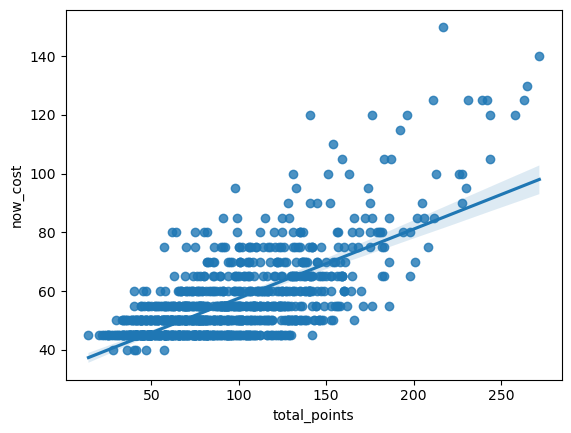

In [1453]:
sns.regplot(x='total_points',y='now_cost',data=EDA_PL)

<Axes: xlabel='Position', ylabel='now_cost'>

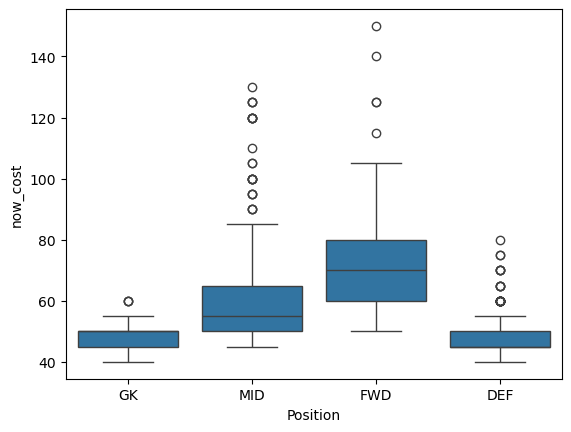

In [1454]:
sns.boxplot(x='Position',y='now_cost',data=EDA_PL)

<Axes: xlabel='Position', ylabel='total_points'>

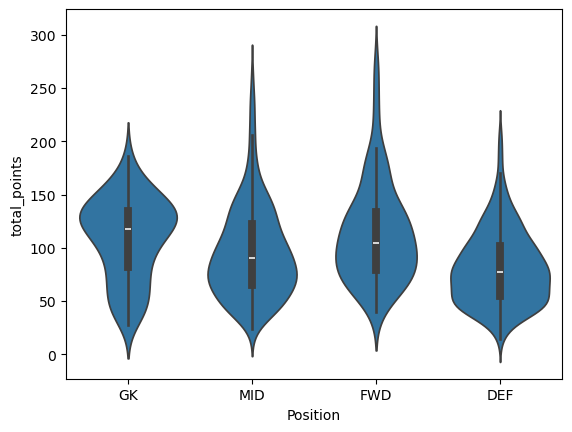

In [1457]:
sns.violinplot(x='Position',y='total_points',data=EDA_PL)

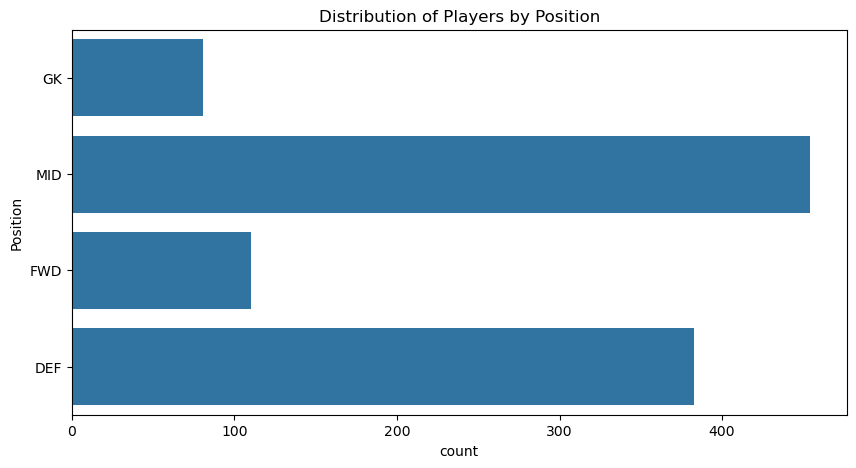

In [1459]:
plt.figure(figsize=(10, 5))
sns.countplot(EDA_PL['Position'])
plt.title('Distribution of Players by Position')
plt.show()

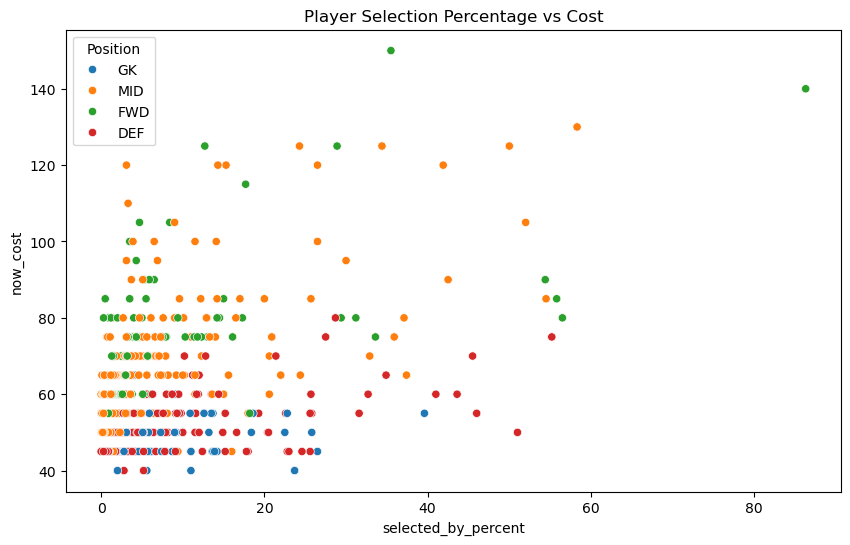

In [1461]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='selected_by_percent', y='now_cost', data=EDA_PL, hue='Position')
plt.title('Player Selection Percentage vs Cost')
plt.show()

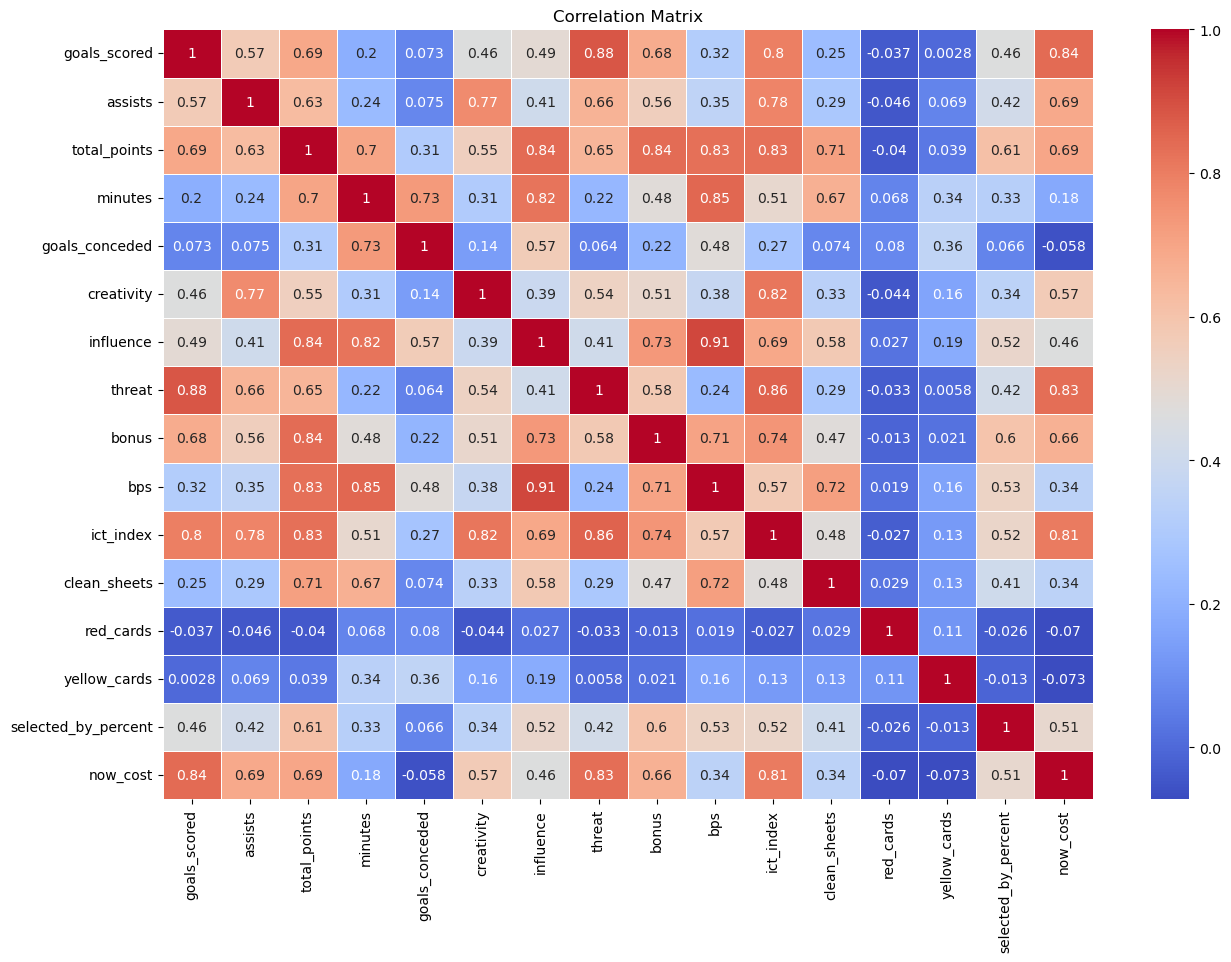

In [1463]:
corr_df = EDA_PL.drop(['first_name', 'second_name', 'Position'], axis=1)
corr_matrix = corr_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# DATA PREP

In [77]:
train_df=pd.concat([PL_2021_2022, PL_2022_2023, PL_2023_2024], axis=0)
train_df.rename(columns={'element_type':'Position'},inplace=True)

In [1468]:
features = ['goals_scored', 'assists', 'total_points', 'minutes', 'goals_conceded', 
             'creativity', 'influence', 'threat', 'bonus', 'bps', 'ict_index', 
             'clean_sheets', 'red_cards', 'yellow_cards', 'selected_by_percent', 'Position']
target = 'now_cost'

In [1470]:
X = train_df[features]
Y = train_df[target]

In [1472]:
print(len(Y))

761


In [1474]:
print(len(X))

761


In [1476]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Handling missing values
            ('scaler', StandardScaler())  # Standardize features
        ]), features[:-1]),  # All features except 'Position'

        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Handling missing values
            ('onehot', OneHotEncoder(drop='first'))  # Convert categorical feature to one-hot encoding
        ]), ['Position'])
    ])

In [1478]:
X_processed = preprocessor.fit_transform(X)

In [1480]:
num_feature_names = preprocessor.transformers_[0][1].named_steps['scaler'].get_feature_names_out()
cat_feature_names = preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out()

# Combine feature names
all_feature_names = list(num_feature_names) + list(cat_feature_names)


In [1482]:
X_processed_df = pd.DataFrame(X_processed, columns=all_feature_names)
X_processed_df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x0_FWD,x0_GK,x0_MID
0,-0.746503,-0.928606,0.877056,1.400955,0.443199,-1.167982,0.967442,-1.016739,0.447759,1.288796,-0.699812,0.915796,2.80328,-1.382198,-0.252651,0.0,1.0,0.0
1,-0.514061,1.335322,-0.397097,-1.129977,-1.171327,0.733033,-1.079767,-0.378506,0.151717,-0.621503,-0.232218,-1.268053,-0.32014,-1.382198,-0.481390,0.0,0.0,1.0
2,1.577919,0.041649,0.877056,0.231148,-0.444790,0.117016,0.010854,1.301796,0.447759,-0.310106,0.719042,0.642815,-0.32014,-0.595472,-0.115407,1.0,0.0,0.0
3,2.275245,0.041649,0.828975,-0.373472,-0.848422,-0.075289,0.509344,1.228371,1.927972,0.252803,0.762879,-0.176128,-0.32014,-0.202109,0.113333,1.0,0.0,0.0
4,-0.514061,-0.281769,-0.589422,0.507170,-0.364064,-0.003486,-0.162654,-0.587485,-1.032453,-0.082547,-0.353500,0.642815,2.80328,1.371343,-0.458516,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,-0.746503,-0.605187,-1.430843,-1.277481,-0.283338,-0.932310,-1.262455,-0.920721,-1.180475,-1.280226,-1.262385,-0.722091,2.80328,-0.595472,-0.515701,0.0,0.0,1.0
757,-0.514061,-0.605187,-0.349015,0.431227,0.523926,0.277330,-0.550981,-0.135639,-0.440368,-0.429874,-0.129932,0.915796,2.80328,-0.595472,-0.481390,0.0,0.0,1.0
758,0.648150,-0.605187,-0.060528,-0.601300,-0.041159,0.654831,-0.529867,0.615555,0.299738,-0.962841,0.418029,-0.449109,-0.32014,0.584617,-0.492827,0.0,0.0,1.0
759,-0.746503,-0.928606,1.285747,1.560143,1.896273,-1.167982,1.701866,-1.022387,1.483908,1.636123,-0.464554,0.915796,-0.32014,-0.595472,-0.355584,0.0,1.0,0.0


# MODEL BUILD V1

In [1485]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42)

#Testing Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"{name}:")
    print(f"  MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"  MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"  R^2: {r2_score(y_test, y_pred)}\n")

Linear Regression:
  MAE: 4.487497173124082
  MSE: 45.634170683292965
  R^2: 0.7148861542603042

Decision Tree:
  MAE: 4.640522875816994
  MSE: 70.91503267973856
  R^2: 0.556936011209715

Random Forest:
  MAE: 3.880718954248366
  MSE: 43.73060457516339
  R^2: 0.7267792827116835

Gradient Boosting:
  MAE: 4.080413982257603
  MSE: 45.14797525247662
  R^2: 0.717923813255428

SVR:
  MAE: 4.38355202564894
  MSE: 62.77313236029697
  R^2: 0.6078050963042125



# PREDICTING ON THIS YEARS DATA

In [1487]:
Prediction_DF=PL_2024_2025

In [1490]:
Prediction_DF.rename(columns={'element_type':'Position'},inplace=True)

In [1492]:
X_Predict = Prediction_DF[features]

In [1494]:
X_Predict_Processed= preprocessor.fit_transform(X_Predict)

In [1496]:
model=LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_Predict_Processed)

In [1498]:
Prediction_DF['Model_Cost'] = predictions

In [1500]:
Prediction_DF

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,Position,Model_Cost
1,Gabriel,Fernando de Jesus,4,7,85,1470,11,403.0,364.8,756.0,10,271,152.7,11,0,6,1.5,70,FWD,79.708641
2,Gabriel,dos Santos Magalhães,3,1,149,3042,26,121.9,675.8,379.0,8,676,117.9,16,0,4,11.9,60,DEF,58.658141
3,Kai,Havertz,13,10,180,2627,22,613.4,763.2,1027.0,15,515,240.2,16,0,11,14.2,80,FWD,97.792859
8,Gabriel,Martinelli Silva,6,5,118,2010,23,717.1,500.4,795.0,6,404,200.8,10,0,1,4.2,70,MID,77.174654
10,Eddie,Nketiah,5,4,71,1065,10,136.3,235.0,417.0,5,206,77.2,6,0,3,0.4,60,FWD,73.000688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,Mario,Lemina,4,1,95,2969,55,333.6,621.6,470.0,13,490,142.7,4,1,10,0.2,50,MID,54.494051
575,Nélson,Cabral Semedo,0,2,63,3084,62,395.7,508.8,165.0,0,455,107.2,5,1,10,0.0,45,DEF,36.028244
576,Pedro,Lomba Neto,2,11,86,1516,27,599.2,371.4,389.0,8,310,135.5,3,0,4,1.2,65,MID,62.124673
581,Pablo,Sarabia,4,7,99,1737,27,795.3,469.2,418.0,8,358,168.4,6,0,5,0.3,55,MID,58.703665


**NOW LETS ANALYZE OUR RESULTS**

In [1503]:
Prediction_DF['Discrepancy']=Prediction_DF['Model_Cost']-Prediction_DF['now_cost']

In [1505]:
Prediction_DF

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,...,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,Position,Model_Cost,Discrepancy
1,Gabriel,Fernando de Jesus,4,7,85,1470,11,403.0,364.8,756.0,...,271,152.7,11,0,6,1.5,70,FWD,79.708641,9.708641
2,Gabriel,dos Santos Magalhães,3,1,149,3042,26,121.9,675.8,379.0,...,676,117.9,16,0,4,11.9,60,DEF,58.658141,-1.341859
3,Kai,Havertz,13,10,180,2627,22,613.4,763.2,1027.0,...,515,240.2,16,0,11,14.2,80,FWD,97.792859,17.792859
8,Gabriel,Martinelli Silva,6,5,118,2010,23,717.1,500.4,795.0,...,404,200.8,10,0,1,4.2,70,MID,77.174654,7.174654
10,Eddie,Nketiah,5,4,71,1065,10,136.3,235.0,417.0,...,206,77.2,6,0,3,0.4,60,FWD,73.000688,13.000688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,Mario,Lemina,4,1,95,2969,55,333.6,621.6,470.0,...,490,142.7,4,1,10,0.2,50,MID,54.494051,4.494051
575,Nélson,Cabral Semedo,0,2,63,3084,62,395.7,508.8,165.0,...,455,107.2,5,1,10,0.0,45,DEF,36.028244,-8.971756
576,Pedro,Lomba Neto,2,11,86,1516,27,599.2,371.4,389.0,...,310,135.5,3,0,4,1.2,65,MID,62.124673,-2.875327
581,Pablo,Sarabia,4,7,99,1737,27,795.3,469.2,418.0,...,358,168.4,6,0,5,0.3,55,MID,58.703665,3.703665


In [219]:
def classify_player_value(df):

   
    mean_discrepancy = df['Discrepancy'].mean()
    std_discrepancy = df['Discrepancy'].std()

    # Define thresholds
    threshold_amazing_value = mean_discrepancy + 1.75 * std_discrepancy
    threshold_good_value = mean_discrepancy + 0.75 * std_discrepancy
    threshold_bad_value = mean_discrepancy - 0.75 * std_discrepancy
    threshold_very_bad_value = mean_discrepancy - 1.75 * std_discrepancy

    def classify_discrepancy(discrepancy):
        if discrepancy > threshold_amazing_value:
            return 'Amazing'
        elif discrepancy > threshold_good_value:
            return 'Good'
        elif discrepancy < threshold_very_bad_value:
            return 'Very Bad'
        elif discrepancy < threshold_bad_value:
            return 'Bad'
        else:
            return 'Neutral'

    df['Value'] = df['Discrepancy'].apply(classify_discrepancy)

    return df


In [1509]:
df_classified=classify_player_value(Prediction_DF)

In [1511]:
df_classified[df_classified['Value'] == 'Very Bad']

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,...,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,Position,Model_Cost,Discrepancy,Value
128,Pascal,Groß,4,11,153,3112,50,1674.9,988.6,434.0,...,309.9,7,0,6,2.0,65,MID,47.919715,-17.080285,Very Bad
321,Trent,Alexander-Arnold,3,5,122,2153,28,1027.5,601.8,237.0,...,186.8,8,0,6,21.4,70,DEF,46.782823,-23.217177,Very Bad
355,Kevin,De Bruyne,4,10,98,1219,8,901.1,527.6,406.0,...,183.6,7,0,2,6.9,95,MID,65.101315,-29.898685,Very Bad
377,Bruno,Borges Fernandes,10,9,166,3118,52,1663.0,1101.6,748.0,...,351.3,7,0,9,14.2,85,MID,65.191931,-19.808069,Very Bad
430,Kieran,Trippier,1,10,111,2235,43,1028.5,719.0,102.0,...,185.2,6,0,5,14.4,60,DEF,40.932286,-19.067714,Very Bad


In [1513]:
df_classified.groupby('Position')['Discrepancy'].mean()

Position
DEF    -2.073047
FWD    17.082498
GK     -3.406063
MID     0.702566
Name: Discrepancy, dtype: float64

# Currently We Are Dealing With These Issues:

    Players who had one bad season are being undervalued, opposite for a great season

    Model Predictions variance is too high

    Forwards are being overvalued while defenders and goalkeepers are being undervalued


# Model Build V2

In [131]:
train_df=pd.concat([final_2021, final_2022, final_2023], axis=0)

train_df.rename(columns={'element_type':'Position'},inplace=True)

In [135]:
train_df=train_df.dropna(axis=1, how='any')

In [137]:
train_df['strength_overall']=(train_df['strength_overall_home']+train_df['strength_overall_away'])/2
train_df['defence_overall']=(train_df['strength_defence_home']+train_df['strength_defence_away'])/2
train_df['attack_overall']=(train_df['strength_attack_home']+train_df['strength_attack_away'])/2

In [141]:
train_df_defenders = train_df[train_df['Position'] == 'DEF']
train_df_goalkeepers = train_df[train_df['Position'] == 'GK']
train_df_midfielders = train_df[train_df['Position'] == 'MID']
train_df_forwards = train_df[train_df['Position'] == 'FWD']

In [149]:
GK_features = ['total_points', 'minutes', 'goals_conceded','bonus', 'bps','influence','ict_index', 
             'clean_sheets', 'red_cards', 'yellow_cards','strength_overall','defence_overall', 'attack_overall']
def_features = ['goals_scored', 'assists', 'total_points', 'minutes', 'goals_conceded','creativity', 
              'influence', 'threat', 'bonus', 'bps', 'ict_index', 'clean_sheets', 'red_cards', 'yellow_cards','strength_overall',
              'defence_overall', 'attack_overall']
mid_features = ['goals_scored', 'assists', 'total_points', 'minutes', 
             'creativity', 'influence', 'threat', 'bonus', 'bps', 'ict_index', 'clean_sheets', 'red_cards', 'yellow_cards','strength_overall',
           'defence_overall', 'attack_overall']
fwd_features=['goals_scored', 'assists', 'total_points', 'minutes', 
             'creativity', 'influence', 'threat', 'bonus', 'bps', 'ict_index', 'red_cards', 'yellow_cards', 'strength_overall',
             'defence_overall', 'attack_overall']
target = 'now_cost'

In [151]:
X_defenders = train_df_defenders[def_features]
Y_defenders = train_df_defenders[target]
X_goalkeepers = train_df_goalkeepers[GK_features]
Y_goalkeepers = train_df_goalkeepers[target]
X_midfielders = train_df_midfielders[mid_features]
Y_midfielders = train_df_midfielders[target]
X_forwards = train_df_forwards[fwd_features]
Y_forwards = train_df_forwards [target]

In [153]:
def define_preprocessor_for_group(group):
    if group == 'defenders':
        return ColumnTransformer(
            transformers=[
                ('num', Pipeline(steps=[
                    ('imputer', SimpleImputer(strategy='mean')), 
                    ('scaler', StandardScaler())
                ]), def_features)
            ]
        )
    elif group == 'goalkeepers':
        return ColumnTransformer(
            transformers=[
                ('num', Pipeline(steps=[
                    ('imputer', SimpleImputer(strategy='mean')), 
                    ('scaler', StandardScaler())
                ]), GK_features)
            ]
        )
    elif group == 'midfielders':
        return ColumnTransformer(
            transformers=[
                ('num', Pipeline(steps=[
                    ('imputer', SimpleImputer(strategy='mean')), 
                    ('scaler', StandardScaler())
                ]), mid_features)
            ]
        )
    elif group == 'forwards':
        return ColumnTransformer(
            transformers=[
                ('num', Pipeline(steps=[
                    ('imputer', SimpleImputer(strategy='mean')), 
                    ('scaler', StandardScaler())
                ]), fwd_features)
            ]
        )
    else:
        raise ValueError(f"Unknown group: {group}")

In [155]:
model_candidates = {
    'defenders': [
        ('Linear Regression', LinearRegression()),
        ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('Gradient Boosting', GradientBoostingRegressor(n_estimators=100, random_state=42)),
        ('SVR', SVR()),
        ('Ridge Regression', Ridge()),
        ('Lasso Regression', Lasso()),
        ('ElasticNet Regression', ElasticNet()),
        ('XGBoost', xgb.XGBRegressor())

    ],
    'goalkeepers': [
        ('Linear Regression', LinearRegression()),
        ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('Gradient Boosting', GradientBoostingRegressor(n_estimators=100, random_state=42)),
        ('SVR', SVR()),
        ('Ridge Regression', Ridge()),
        ('Lasso Regression', Lasso()),
        ('ElasticNet Regression', ElasticNet()),
        ('XGBoost', xgb.XGBRegressor())
    ],
    'midfielders': [
        ('Linear Regression', LinearRegression()),
        ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('Gradient Boosting', GradientBoostingRegressor(n_estimators=100, random_state=42)),
        ('SVR', SVR()),
        ('Ridge Regression', Ridge()),
        ('Lasso Regression', Lasso()),
        ('ElasticNet Regression', ElasticNet()),
        ('XGBoost', xgb.XGBRegressor())
    ],
    'forwards': [
        ('Linear Regression', LinearRegression()),
        ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('Gradient Boosting', GradientBoostingRegressor(n_estimators=100, random_state=42)),
        ('SVR', SVR()),
        ('Ridge Regression', Ridge()),
        ('Lasso Regression', Lasso()),
        ('ElasticNet Regression', ElasticNet()),
        ('XGBoost', xgb.XGBRegressor())
    ]
}


In [157]:
features_dict = {
    'goalkeepers': GK_features,
    'defenders': def_features,
    'midfielders': mid_features,
    'forwards': fwd_features
}

In [161]:
def train_and_evaluate_model(X, y, model, preprocessor):
    """Train and evaluate the model with preprocessing."""
    X_processed = preprocessor.fit_transform(X)
    model.fit(X_processed, y)
    predictions = model.predict(X_processed)
    mse = mean_squared_error(y, predictions)
    r2 = r2_score(y, predictions)
    return model, mse, r2

In [163]:
best_models = {}
best_mse_scores = {}
best_r2_scores = {}
best_preprocessors = {}

for group, models in model_candidates.items():
    model_performance = []
    for name, model in models:
        #Get Preprocessor
        preprocessor = define_preprocessor_for_group(group)
        
        #Train
        trained_model, mse, r2 = train_and_evaluate_model(eval(f'X_{group}'), eval(f'Y_{group}'), model, preprocessor)
        print(f"{group.capitalize()} - {name} Model MSE: {mse}, R2: {r2}")
        
        # List of name model preprocessor
        model_performance.append((name, trained_model, preprocessor, mse, r2))

    # Sort models 
    model_performance.sort(key=lambda x: (x[3], -x[4]))

    # Extract the sorted models into the best_models list for each group
    best_models[group] = [(name, model, preprocessor) for name, model, preprocessor, mse, r2 in model_performance]
    


Defenders - Linear Regression Model MSE: 8.801378828964264, R2: 0.7196712366302522
Defenders - Random Forest Model MSE: 1.243726937269372, R2: 0.9603866120218579
Defenders - Gradient Boosting Model MSE: 0.9560919063459831, R2: 0.9695479461818218
Defenders - SVR Model MSE: 17.475944577657344, R2: 0.44338153971388106
Defenders - Ridge Regression Model MSE: 8.943162105430467, R2: 0.715155361182705
Defenders - Lasso Regression Model MSE: 14.217530815739899, R2: 0.5471638127163008
Defenders - ElasticNet Regression Model MSE: 12.51210254405342, R2: 0.6014826424937865
Defenders - XGBoost Model MSE: 1.3865667311096653e-06, R2: 0.9999999558370859
Goalkeepers - Linear Regression Model MSE: 5.187391007457818, R2: 0.7740603027862817
Goalkeepers - Random Forest Model MSE: 1.5821428571428575, R2: 0.9310888888888889
Goalkeepers - Gradient Boosting Model MSE: 0.04863309608282519, R2: 0.9978817584817259
Goalkeepers - SVR Model MSE: 11.587366071284517, R2: 0.49530583333960776
Goalkeepers - Ridge Regress

# NOW LETS TRY TO PREDICT USING OUR NEW MODELS

In [189]:
final_2024.rename(columns={'element_type':'Position'},inplace=True)

In [193]:
final_2024=final_2024.dropna(axis=1, how='any')

In [ ]:
final_2024['strength_overall']=(final_2024['strength_overall_home']+final_2024['strength_overall_away'])/2
final_2024['defence_overall']=(final_2024['strength_defence_home']+final_2024['strength_defence_away'])/2
final_2024['attack_overall']=(final_2024['strength_attack_home']+final_2024['strength_attack_away'])/2

In [201]:
Prediction_DF_defenders = final_2024[final_2024['Position'] == 'DEF']
Prediction_DF_goalkeepers = final_2024[final_2024['Position'] == 'GK']
Prediction_DF_midfielders = final_2024[final_2024['Position'] == 'MID']
Prediction_DF_forwards = final_2024[final_2024['Position'] == 'FWD']

In [203]:
def preprocess_and_predict(new_X, best_model_info):
    name, model, preprocessor = best_model_info
    X_processed = preprocessor.transform(new_X)  
    predictions = model.predict(X_processed)
    return predictions


In [205]:
best_models['defenders'][0]

('XGBoost',
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...),
 ColumnTransformer(transformers=[('num',
                                  Pipeline(steps=[('imputer', SimpleImputer()),
                                                  ('scaler', StandardScaler())]),
                          

In [207]:
defender_features = Prediction_DF_defenders[def_features]
defender_predictions = preprocess_and_predict(defender_features, best_models['defenders'][0])

goalkeeper_features = Prediction_DF_goalkeepers[GK_features]
goalkeeper_predictions = preprocess_and_predict(goalkeeper_features, best_models['goalkeepers'][0])

midfielder_features = Prediction_DF_midfielders[mid_features]
midfielder_predictions = preprocess_and_predict(midfielder_features, best_models['midfielders'][0])

forward_features = Prediction_DF_forwards[fwd_features]
forward_predictions = preprocess_and_predict(forward_features, best_models['forwards'][0])


In [ ]:
Prediction_DF_defenders['Model_Price'] = defender_predictions
Prediction_DF_goalkeepers['Model_Price'] = goalkeeper_predictions
Prediction_DF_midfielders['Model_Price'] = midfielder_predictions
Prediction_DF_forwards['Model_Price'] = forward_predictions

In [211]:
final_predicted_df = pd.concat([Prediction_DF_defenders, Prediction_DF_goalkeepers, Prediction_DF_midfielders, Prediction_DF_forwards])

In [213]:
final_predicted_df

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,...,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id,strength_overall,defence_overall,attack_overall,Model_Price
1,Gabriel,dos Santos Magalhães,3,1,149,3042,26,121.9,675.8,379.0,...,1380,1370,1370,1330,1390,1,1365.0,1360.0,1370.0,52.172844
9,William,Saliba,2,1,164,3420,29,152.1,697.2,140.0,...,1380,1370,1370,1330,1390,1,1365.0,1360.0,1370.0,56.809738
10,Tomiyasu,Takehiro,2,1,70,1140,10,141.8,247.0,143.0,...,1380,1370,1370,1330,1390,1,1365.0,1360.0,1370.0,54.649666
12,Benjamin,White,4,5,182,2987,26,589.4,765.8,234.0,...,1380,1370,1370,1330,1390,1,1365.0,1360.0,1370.0,60.300438
13,Oleksandr,Zinchenko,1,2,104,1717,15,474.8,395.4,133.0,...,1380,1370,1370,1330,1390,1,1365.0,1360.0,1370.0,55.025581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,Taiwo,Awoniyi,6,3,67,1036,21,134.4,303.2,308.0,...,1100,1085,1115,1090,1090,15,1095.0,1090.0,1100.0,64.553909
219,Chris,Wood,14,1,131,1801,34,281.1,598.2,795.0,...,1100,1085,1115,1090,1090,15,1095.0,1090.0,1100.0,79.982513
232,Richarlison,de Andrade,11,4,122,1481,18,208.4,560.6,758.0,...,1225,1100,1125,1230,1330,21,1195.0,1280.0,1112.5,77.885376
240,Michail,Antonio,6,2,78,1692,34,132.2,308.6,395.0,...,1100,1060,1100,1130,1105,25,1097.5,1117.5,1080.0,62.539761


In [215]:
final_predicted_df['Discrepancy']=final_predicted_df['Model_Price']-final_predicted_df['now_cost']

In [221]:
final_df_classified=classify_player_value(final_predicted_df)

<Axes: xlabel='Position', ylabel='count'>

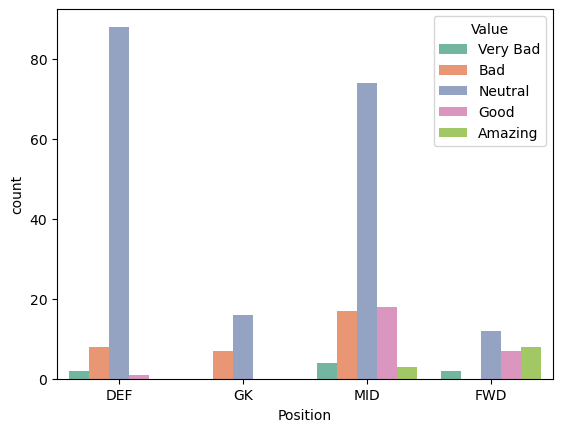

In [225]:
sns.countplot(data=final_df_classified, x='Position', hue='Value', palette='Set2', hue_order=['Very Bad', 'Bad', 'Neutral', 'Good','Amazing'] )

In [227]:
final_df_classified.groupby('Position').Discrepancy.mean()

Position
DEF   -0.310794
FWD    7.300820
GK    -1.398621
MID    0.758280
Name: Discrepancy, dtype: float64

<Axes: xlabel='Position', ylabel='Discrepancy'>

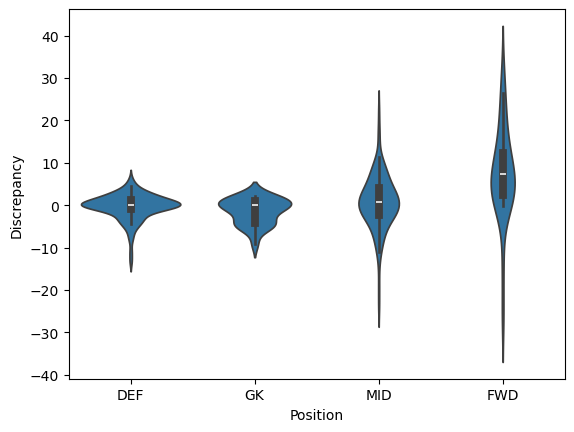

In [231]:
sns.violinplot(y='Discrepancy', x='Position',data=final_df_classified)

**Discrepancy seem to be larger for our forwards so lets change our scale for value classification by classifying on each position group individually and then combining DF**

In [241]:
def classify_player_value(df):

    
    mean_discrepancy = df['Discrepancy'].mean()
    std_discrepancy = df['Discrepancy'].std()

    # Define thresholds
    threshold_amazing_value = mean_discrepancy + 1.5 * std_discrepancy
    threshold_good_value = mean_discrepancy + 0.5 * std_discrepancy
    threshold_bad_value = mean_discrepancy - 0.5 * std_discrepancy
    threshold_very_bad_value = mean_discrepancy - 1.5 * std_discrepancy

    def classify_discrepancy(discrepancy):
        if discrepancy > threshold_amazing_value:
            return 'Amazing'
        elif discrepancy > threshold_good_value:
            return 'Good'
        elif discrepancy < threshold_very_bad_value:
            return 'Very Bad'
        elif discrepancy < threshold_bad_value:
            return 'Bad'
        else:
            return 'Neutral'

    # Apply classification
    df['Value'] = df['Discrepancy'].apply(classify_discrepancy)

    return df

In [ ]:
Prediction_DF_forwards['Discrepancy']=Prediction_DF_forwards['Model_Price']-Prediction_DF_forwards['now_cost']
Prediction_DF_defenders['Discrepancy']=Prediction_DF_defenders['Model_Price']-Prediction_DF_defenders['now_cost']
Prediction_DF_goalkeepers['Discrepancy']=Prediction_DF_goalkeepers['Model_Price']-Prediction_DF_goalkeepers['now_cost']
Prediction_DF_midfielders['Discrepancy']=Prediction_DF_midfielders['Model_Price']-Prediction_DF_midfielders['now_cost']

In [ ]:
Prediction_DF_forwards=classify_player_value(Prediction_DF_forwards)
Prediction_DF_defenders=classify_player_value(Prediction_DF_defenders)
Prediction_DF_goalkeepers=classify_player_value(Prediction_DF_goalkeepers)
Prediction_DF_midfielders=classify_player_value(Prediction_DF_midfielders)

In [252]:
new_final_predicted_df_classified = pd.concat([Prediction_DF_defenders, Prediction_DF_goalkeepers, Prediction_DF_midfielders, Prediction_DF_forwards])

<Axes: xlabel='Position', ylabel='count'>

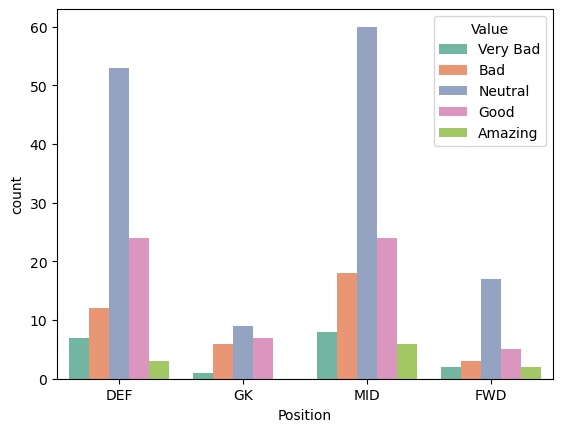

In [254]:
sns.countplot(data=new_final_predicted_df_classified, x='Position', hue='Value', palette='Set2', hue_order=['Very Bad', 'Bad', 'Neutral', 'Good','Amazing'] )

In [362]:
Amazing_DF=new_final_predicted_df_classified[new_final_predicted_df_classified['Value']=='Amazing']

In [366]:
Amazing_DF[['first_name','second_name','Position','now_cost','Model_Price','Value']]

,first_name,second_name,Position,now_cost,Model_Price,Value
10,Tomiyasu,Takehiro,DEF,50,54.649666,Amazing
13,Oleksandr,Zinchenko,DEF,50,55.025581,Amazing
221,Charlie,Taylor,DEF,40,45.927311,Amazing
88,Cole,Palmer,MID,105,115.920616,Amazing
137,Bobby,De Cordova-Reid,MID,55,65.656944,Amazing
142,Harvey,Elliott,MID,55,72.010376,Amazing
149,Luis,Díaz,MID,75,91.267632,Amazing
160,Jérémy,Doku,MID,65,76.263786,Amazing
162,Phil,Foden,MID,95,117.081802,Amazing
69,João Pedro,Junqueira de Jesus,FWD,55,81.358139,Amazing
